In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [126]:
data=pd.read_csv('labor.csv')

# Variable Identification

In [127]:
data.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below_average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good


In [128]:
data.dtypes

duration                          object
wage-increase-first-year          object
wage-increase-second-year         object
wage-increase-third-year          object
cost-of-living-adjustment         object
working-hours                     object
pension                           object
standby-pay                       object
shift-differential                object
education-allowance               object
statutory-holidays                object
vacation                          object
longterm-disability-assistance    object
contribution-to-dental-plan       object
bereavement-assistance            object
contribution-to-health-plan       object
class                             object
dtype: object

In [129]:
data.count()

duration                          57
wage-increase-first-year          57
wage-increase-second-year         57
wage-increase-third-year          57
cost-of-living-adjustment         57
working-hours                     57
pension                           57
standby-pay                       57
shift-differential                57
education-allowance               57
statutory-holidays                57
vacation                          57
longterm-disability-assistance    57
contribution-to-dental-plan       57
bereavement-assistance            57
contribution-to-health-plan       57
class                             57
dtype: int64

In [130]:
data.describe()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
count,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
unique,4,18,16,10,4,9,4,8,11,3,7,4,3,4,3,4,2
top,2,2,4,?,none,40,?,?,?,?,11,below_average,?,?,?,full,good
freq,27,10,13,42,22,23,30,48,26,35,21,18,29,20,27,20,37


# Data Cleaning


In [131]:
data[data=="?"].count()

duration                           1
wage-increase-first-year           1
wage-increase-second-year         11
wage-increase-third-year          42
cost-of-living-adjustment         20
working-hours                      6
pension                           30
standby-pay                       48
shift-differential                26
education-allowance               35
statutory-holidays                 4
vacation                           6
longterm-disability-assistance    29
contribution-to-dental-plan       20
bereavement-assistance            27
contribution-to-health-plan       20
class                              0
dtype: int64

In [132]:
data=data.replace(to_replace ="?",value =0)

In [133]:
data=data.drop(['wage-increase-third-year','pension','pension','standby-pay','shift-differential','education-allowance','longterm-disability-assistance','bereavement-assistance'],axis=1)

In [134]:
data.dtypes

duration                       object
wage-increase-first-year       object
wage-increase-second-year      object
cost-of-living-adjustment      object
working-hours                  object
statutory-holidays             object
vacation                       object
contribution-to-dental-plan    object
contribution-to-health-plan    object
class                          object
dtype: object

In [135]:
data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']]=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']].apply(pd.to_numeric)

In [136]:
data.dtypes

duration                        object
wage-increase-first-year       float64
wage-increase-second-year      float64
cost-of-living-adjustment       object
working-hours                    int64
statutory-holidays               int64
vacation                        object
contribution-to-dental-plan     object
contribution-to-health-plan     object
class                           object
dtype: object

In [137]:
data.describe()

,wage-increase-first-year,wage-increase-second-year,working-hours,statutory-holidays
count,57.000000,57.000000,57.000000,57.000000
mean,3.736842,3.205263,34.035088,10.315789
std,1.448723,1.894581,12.013333,3.106203
min,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.500000,35.000000,10.000000
50%,4.000000,4.000000,38.000000,11.000000
75%,4.500000,4.500000,40.000000,12.000000
max,7.000000,7.000000,40.000000,15.000000


In [138]:
data=data.replace(0,np.nan)

In [139]:
data.isnull().sum()

duration                        1
wage-increase-first-year        1
wage-increase-second-year      11
cost-of-living-adjustment      20
working-hours                   6
statutory-holidays              4
vacation                        6
contribution-to-dental-plan    20
contribution-to-health-plan    20
class                           0
dtype: int64

In [140]:
data['cost-of-living-adjustment'].fillna(method='ffill',inplace=True)

In [141]:
data['contribution-to-dental-plan'].fillna(method='ffill',inplace=True)

In [142]:
data['contribution-to-health-plan'].fillna(method='ffill',inplace=True)

In [143]:
data.isnull().sum()

duration                        1
wage-increase-first-year        1
wage-increase-second-year      11
cost-of-living-adjustment       3
working-hours                   6
statutory-holidays              4
vacation                        6
contribution-to-dental-plan     1
contribution-to-health-plan     1
class                           0
dtype: int64

In [144]:
data.dropna(inplace=True) # dropping all the columns with null values

In [145]:
data.isnull().sum()

duration                       0
wage-increase-first-year       0
wage-increase-second-year      0
cost-of-living-adjustment      0
working-hours                  0
statutory-holidays             0
vacation                       0
contribution-to-dental-plan    0
contribution-to-health-plan    0
class                          0
dtype: int64

# Visualization

In [146]:
data.dtypes

duration                        object
wage-increase-first-year       float64
wage-increase-second-year      float64
cost-of-living-adjustment       object
working-hours                  float64
statutory-holidays             float64
vacation                        object
contribution-to-dental-plan     object
contribution-to-health-plan     object
class                           object
dtype: object

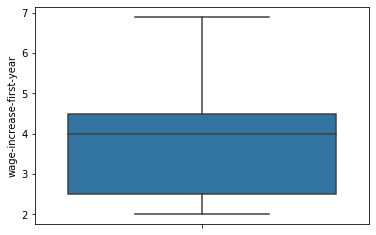

In [147]:
sns.boxplot(y='wage-increase-first-year',data=data)

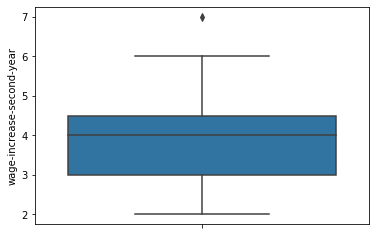

In [148]:
sns.boxplot(y='wage-increase-second-year',data=data)

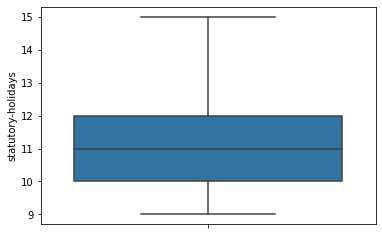

In [149]:
sns.boxplot(y='statutory-holidays',data=data)

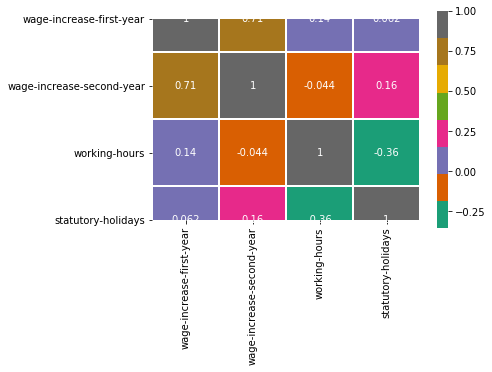

In [150]:
cr=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']].corr()
sns.heatmap(cr,square=True,annot=True,cmap='Dark2',linewidth=0.9)

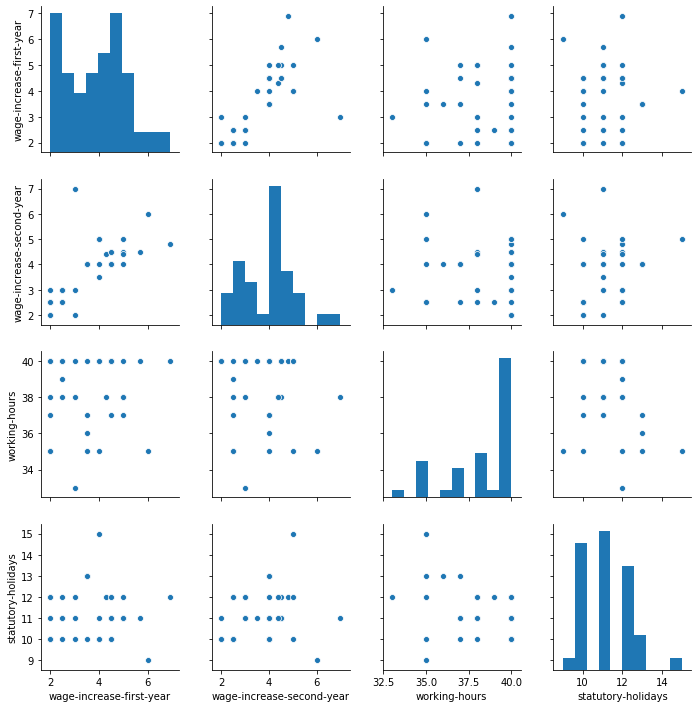

In [151]:
cdata=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']]
sns.pairplot(cdata)

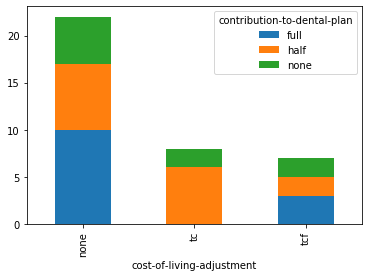

In [154]:
pd.crosstab(data['cost-of-living-adjustment'],data['contribution-to-dental-plan']).plot(kind='bar',stacked=True)

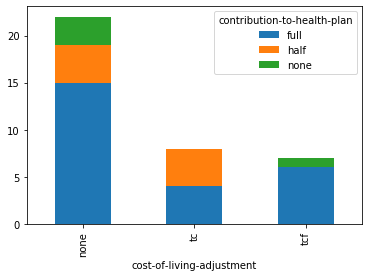

In [155]:
pd.crosstab(data['cost-of-living-adjustment'],data['contribution-to-health-plan']).plot(kind='bar',stacked=True)